# 采用 sklearn 里的 Robust covariance 算法

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope

# 参数设定

In [19]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# 建立算法模型

In [20]:
anomaly_algorithms = EllipticEnvelope(contamination=outliers_fraction)

# 创建数据

In [21]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets =  make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,**blobs_params)[0]
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
rng = np.random.RandomState(42)
X = np.concatenate([datasets, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)
X.shape

(300, 2)

# 训练并可视化

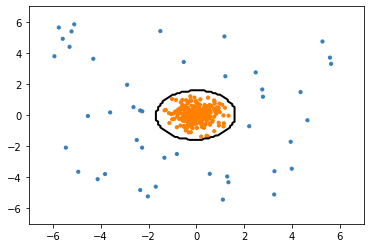

In [22]:
anomaly_algorithms.fit(X)
y_pred = anomaly_algorithms.predict(X)
Z = anomaly_algorithms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
plt.show()

# 建立攻击数据

In [34]:
a1 = rng.uniform(low=1.2, high=2.2, size=(n_outliers, 1))
a2 = rng.uniform(low=-1.0, high=2.5, size=(n_outliers, 1))
atk = np.concatenate([a1,a2], axis=1)
atk.shape

(45, 2)

# 进行数据合并

In [37]:
atk_X = np.concatenate([X, atk], axis=0)
atk_X.shape

(345, 2)

# 再训练并可视化

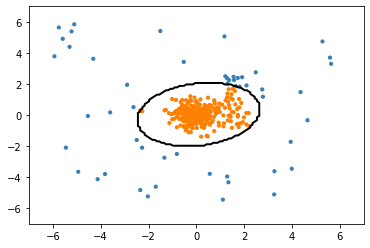

In [38]:
anomaly_algorithms.fit(atk_X)
y_pred = anomaly_algorithms.predict(atk_X)
Z = anomaly_algorithms.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
colors = np.array(['#377eb8', '#ff7f00'])
plt.scatter(atk_X[:, 0], atk_X[:, 1], s=10, color=colors[(y_pred + 1) // 2])
plt.show()